In [ ]:
from google.colab import files
uploaded = files.upload()

Saving wifi_localization.csv to wifi_localization.csv


In [ ]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
#Loading Dataset
data = pd.read_csv("wifi_localization.csv")
data

,ws1,ws2,ws3,ws4,ws5,ws6,ws7,class
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4


# New section

In [ ]:
x=data.iloc[:,0:7].values
x

array([[-64, -56, -61, ..., -71, -82, -81],
       [-68, -57, -61, ..., -71, -85, -85],
       [-63, -60, -60, ..., -76, -85, -84],
       ...,
       [-62, -59, -46, ..., -45, -87, -88],
       [-62, -58, -52, ..., -41, -90, -85],
       [-59, -50, -45, ..., -45, -88, -87]])

In [ ]:
y=data.iloc[:,7].values
y


array([1, 1, 1, ..., 4, 4, 4])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#Initialising ANN
ann = tf.keras.models.Sequential()

In [ ]:
 #Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=3,activation="relu"))
ann.add(tf.keras.layers.Dense(units=3,activation="relu"))
ann.add(tf.keras.layers.Dense(units=3,activation="relu"))

In [ ]:
 #Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="softmax"))


In [ ]:
from keras.optimizers import SGD
opt = SGD(lr=0.4, momentum=0.8)
ann.compile(optimizer=opt)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#Compiling ANN
ann.compile(optimizer="adam",loss="mean_squared_error",metrics=['accuracy'])

In [ ]:
#Fitting ANN
ann.fit(x_train,y_train,batch_size=100,epochs = 1000)

Epoch 1/1000
14/14 [==============================] - 1s 2ms/step - loss: 3.5614 - accuracy: 0.2450
Epoch 2/1000
14/14 [==============================] - 0s 2ms/step - loss: 3.5614 - accuracy: 0.2450
Epoch 3/1000
14/14 [==============================] - 0s 2ms/step - loss: 3.5614 - accuracy: 0.2450
Epoch 4/1000
14/14 [==============================] - 0s 2ms/step - loss: 3.5614 - accuracy: 0.2450
Epoch 5/1000
14/14 [==============================] - 0s 2ms/step - loss: 3.5614 - accuracy: 0.2450
Epoch 6/1000
14/14 [==============================] - 0s 2ms/step - loss: 3.5614 - accuracy: 0.2450
Epoch 7/1000
14/14 [==============================] - 0s 2ms/step - loss: 3.5614 - accuracy: 0.2450
Epoch 8/1000
14/14 [==============================] - 0s 2ms/step - loss: 3.5614 - accuracy: 0.2450
Epoch 9/1000
14/14 [==============================] - 0s 2ms/step - loss: 3.5614 - accuracy: 0.2450
Epoch 10/1000
14/14 [==============================] - 0s 2ms/step - loss: 3.5614 - accuracy: 0.2450

In [ ]:
ann.predict([[-82,-82,-66,-96,-55,-58,-77]])

1/1 [==============================] - 0s 348ms/step


array([[1.]], dtype=float32)

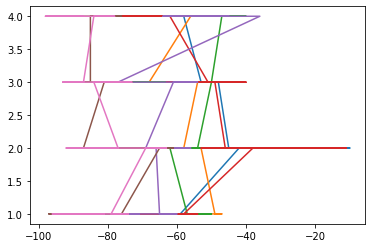

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,y)